
Setup the lowest 36 prime numbers as the cross correlator inputs

In [1]:
import glob
from craco.cardcap import CardcapFile
import numpy as np
from astropy.io import fits
from pylab import *
import glob
%matplotlib notebook



In [2]:
!ls -lrth data/testdata-primes/*.fits

-rw-rw-r-- 1 ban115 ban115 330M May 24 15:27 data/testdata-primes/test-debughdr-lsb0.fits
-rw-rw-r-- 1 ban115 ban115 330M May 24 15:28 data/testdata-primes/test-debughdr-lsb1.fits
-rw-rw-r-- 1 ban115 ban115 330M May 24 15:28 data/testdata-primes/test-debughdr-lsb2.fits
-rw-rw-r-- 1 ban115 ban115 330M May 24 15:28 data/testdata-primes/test-debughdr-lsb3.fits
-rw-rw-r-- 1 ban115 ban115 330M May 24 15:28 data/testdata-primes/test-debughdr-lsb4.fits
-rw-rw-r-- 1 ban115 ban115 330M May 24 15:29 data/testdata-primes/test-debughdr-lsb5.fits
-rw-rw-r-- 1 ban115 ban115 330M May 24 15:29 data/testdata-primes/test-debughdr-lsb6.fits
-rw-rw-r-- 1 ban115 ban115 330M May 24 15:29 data/testdata-primes/test-debughdr-lsb7.fits
-rw-rw-r-- 1 ban115 ban115 330M May 24 15:29 data/testdata-primes/test-debughdr-lsb8.fits
-rw-rw-r-- 1 ban115 ban115 330M May 24 15:30 data/testdata-primes/test-debughdr-lsb9.fits
-rw-rw-r-- 1 ban115 ban115 330M May 24 15:30 data/testdata-primes/test-debughdr-lsb10.fits
-rw-rw-r-

In [3]:
d = []

for lsb in range(12):
    fname = f'data/testdata-primes/test-debughdr-lsb{lsb}.fits'
    ccap = CardcapFile(fname)
    print(fname)
    pkts  = ccap.load_packets()
    d.append(pkts)



data/testdata-primes/test-debughdr-lsb0.fits
data/testdata-primes/test-debughdr-lsb1.fits
data/testdata-primes/test-debughdr-lsb2.fits
data/testdata-primes/test-debughdr-lsb3.fits
data/testdata-primes/test-debughdr-lsb4.fits
data/testdata-primes/test-debughdr-lsb5.fits
data/testdata-primes/test-debughdr-lsb6.fits
data/testdata-primes/test-debughdr-lsb7.fits
data/testdata-primes/test-debughdr-lsb8.fits
data/testdata-primes/test-debughdr-lsb9.fits
data/testdata-primes/test-debughdr-lsb10.fits
data/testdata-primes/test-debughdr-lsb11.fits


In [4]:
nant = 30
idx = 0
products = []
revproducts = {}
auto_products = []
cross_products = []
for a1 in range(1, nant+1):
    for a2 in range(a1, nant+1):
        print(f'{a1}-{a2}:{idx}')
        products.append((a1,a2))
        revproducts[(a1,a2)] = idx
        if a1 == a2:
            auto_products.append(idx)
        else:
            cross_products.append(idx)
            
        idx += 1
      
        
products = np.array(products, dtype=[('a1',np.int16), ('a2', np.int16)])

1-1:0
1-2:1
1-3:2
1-4:3
1-5:4
1-6:5
1-7:6
1-8:7
1-9:8
1-10:9
1-11:10
1-12:11
1-13:12
1-14:13
1-15:14
1-16:15
1-17:16
1-18:17
1-19:18
1-20:19
1-21:20
1-22:21
1-23:22
1-24:23
1-25:24
1-26:25
1-27:26
1-28:27
1-29:28
1-30:29
2-2:30
2-3:31
2-4:32
2-5:33
2-6:34
2-7:35
2-8:36
2-9:37
2-10:38
2-11:39
2-12:40
2-13:41
2-14:42
2-15:43
2-16:44
2-17:45
2-18:46
2-19:47
2-20:48
2-21:49
2-22:50
2-23:51
2-24:52
2-25:53
2-26:54
2-27:55
2-28:56
2-29:57
2-30:58
3-3:59
3-4:60
3-5:61
3-6:62
3-7:63
3-8:64
3-9:65
3-10:66
3-11:67
3-12:68
3-13:69
3-14:70
3-15:71
3-16:72
3-17:73
3-18:74
3-19:75
3-20:76
3-21:77
3-22:78
3-23:79
3-24:80
3-25:81
3-26:82
3-27:83
3-28:84
3-29:85
3-30:86
4-4:87
4-5:88
4-6:89
4-7:90
4-8:91
4-9:92
4-10:93
4-11:94
4-12:95
4-13:96
4-14:97
4-15:98
4-16:99
4-17:100
4-18:101
4-19:102
4-20:103
4-21:104
4-22:105
4-23:106
4-24:107
4-25:108
4-26:109
4-27:110
4-28:111
4-29:112
4-30:113
5-5:114
5-6:115
5-7:116
5-8:117
5-9:118
5-10:119
5-11:120
5-12:121
5-13:122
5-14:123
5-15:124
5-16:125
5-17:126
5-

In [5]:
darr = np.array(d)

In [6]:
darr.shape

(12, 92160)

In [7]:
darr['data'].shape

(12, 92160, 1, 465, 2, 2)

In [8]:
assert np.all(darr['data'][...,1] == 0), 'Imaginary part should be zero'


In [9]:
darr['data'].shape
drd = darr['data']
drd.shape

(12, 92160, 1, 465, 2, 2)

In [13]:
nchan = 4
nbeam = 36
nt = 64
nfpga = 1
blksz = nchan*nbeam*nt*nfpga
nblks = drd.shape[1] // blksz
nblks

10

In [14]:
b0 = drd[0, drd['beam_number'][0] == 0, ...]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [15]:
ccap.mainhdr

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3752 / length of dimension 1                          
NAXIS2  =                92160 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   12 / number of table fields                         
TTYPE1  = 'frame_id'                                                            
TFORM1  = 'K       '                                                            
TZERO1  =                    0                                                  
TTYPE2  = 'bat     '                                                            
TFORM2  = 'K       '        

In [16]:
darr['beam_number'].shape

(12, 92160)

<IPython.core.display.Javascript object>


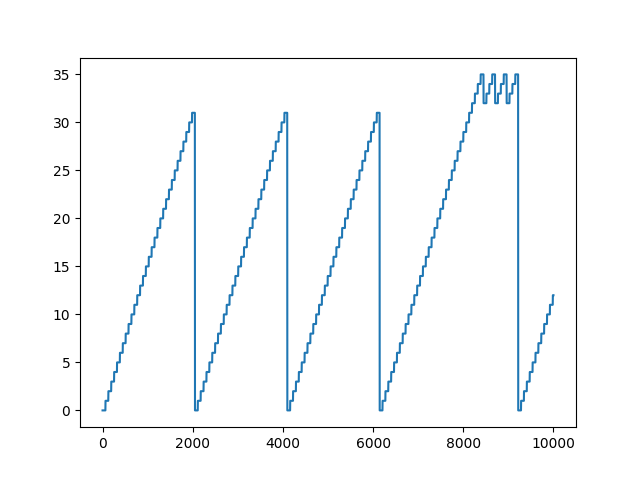

In [17]:
figure()
plot(darr['beam_number'][0,:10000])

<IPython.core.display.Javascript object>


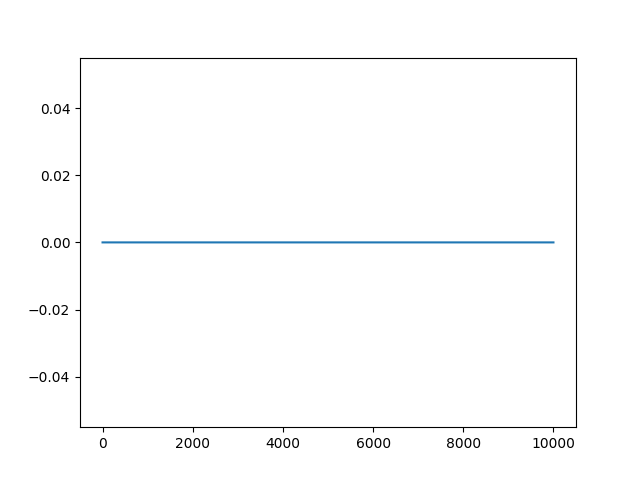

In [18]:
figure()
plot(darr['fpga_id'][0,:10000])

<IPython.core.display.Javascript object>


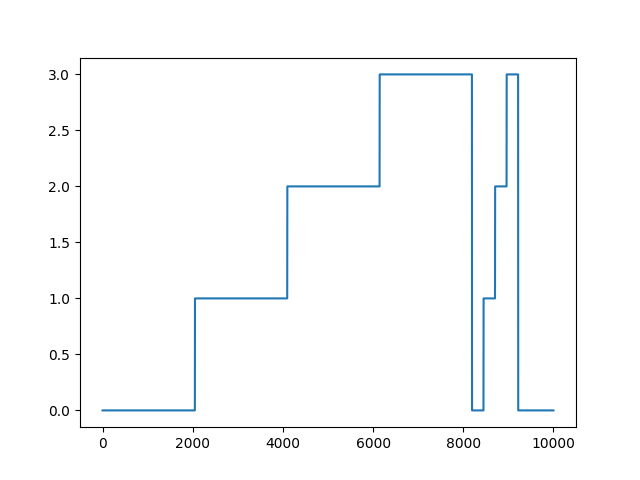

In [19]:
figure()
plot(darr['channel_number'][0,:10000])

In [20]:
dx = darr['data'][:,1,0,:,:,0]
dx.shape

(12, 465, 2)

In [21]:
dx[:,0,0]

array([1152,  576,  288,  144,   72,   36,   18,    9,    4,    2,    1,
          0], dtype=int16)

In [22]:
dx[:,0,1]

array([2592, 1296,  648,  324,  162,   81,   40,   20,   10,    5,    2,
          1], dtype=int16)

In [23]:
3*3*9*32

2592

<IPython.core.display.Javascript object>


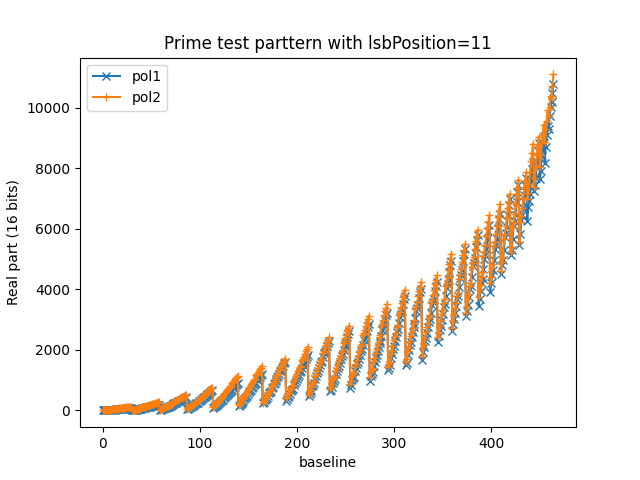

In [24]:
figure()
plot(dx[-1,:,0], '-x', label='pol1')
plot(dx[-1,:,1], '-+', label='pol2')
ylabel('Real part (16 bits)')
xlabel('baseline')
title('Prime test parttern with lsbPosition=11')
legend()

<IPython.core.display.Javascript object>


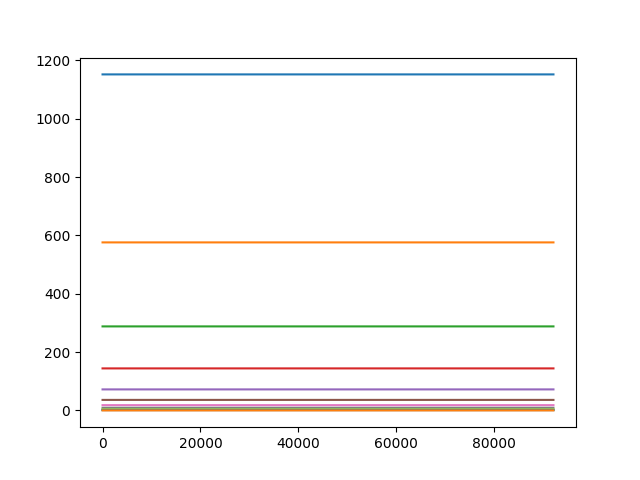

In [25]:
# everything but the first sample is constant in time
figure()
plot(drd[:,1:,0,0,0,0].T)

<IPython.core.display.Javascript object>


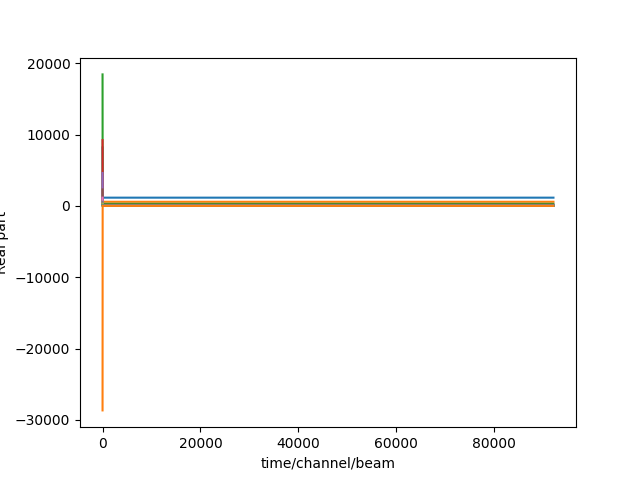

Text(0, 0.5, 'Real part')

In [26]:
# everything but the first sample is constant in time
figure()
plot(darr['data'][:,:,0,0,0,0].T)
xlabel('time/channel/beam')
ylabel('Real part')

In [27]:
drd.shape

(12, 92160, 1, 465, 2, 2)

In [29]:
for lsb in range(12):
    assert np.all(drd[lsb,...] == drd[lsb, 0, ...]), 'Everything should equal first integration'

AssertionError: Everything should equal first integration

In [30]:
for lsb in range(12):
    assert np.all(drd[lsb,1:,...] == drd[lsb, 1, ...]), 'Everything after 2nd integration shoul equal 2nd integration'

In [31]:
# first few baselines of first integration
drd[0,0,0,:10,0,0]

array([  8192, -12288,  12288, -28672,  -4096,  28672,   4096,  28672,
        12288, -20480], dtype=int16)

In [32]:
# # first few baselines of 2nd integration

drd[0,1,0,:10,0,0]

array([  1152,   2880,   6336,   9792,  13248,  17856,  23616,  27072,
       -31552, -26944], dtype=int16)

In [33]:
# first few baselines of 3rd integration

drd[0,2,0,:10,0,0]

array([  1152,   2880,   6336,   9792,  13248,  17856,  23616,  27072,
       -31552, -26944], dtype=int16)

In [34]:
8192/1152

7.111111111111111

In [35]:
dxf = dx.reshape(12,465*2)

In [36]:
dxf.shape

(12, 930)

In [37]:
dxf[0,:10]

array([ 1152,  2592,  2880,  6048,  6336, 11232,  9792, 16416, 13248,
       25056], dtype=int16)

In [38]:
# calcualte primes
import math
import numpy
def prime6(upto=1000000):
    primes=numpy.arange(3,upto+1,2)
    isprime=numpy.ones((upto-1)//2,dtype=bool)
    for factor in primes[:int(math.sqrt(upto))//2]:
        if isprime[(factor-2)//2]: isprime[(factor*3-2)//2::factor]=0
    return numpy.insert(primes[isprime],0,2)

nant = 30
npol = 2
ninput=nant*npol
x = prime6(1000)[:nant*npol] # 60 primes
print(f'Got {len(x)} Primes: {x}')
xpol1 = x[::2]
xpol2 = x[1::2]



Got 60 Primes: [  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281]


In [39]:
xcorr = np.outer(x,x)

In [40]:
xcorr.shape

(60, 60)

In [41]:
#np.set_printoptions(edgeitems=10, linewidth=100)
xcorr

array([[    4,     6,    10, ...,   542,   554,   562],
       [    6,     9,    15, ...,   813,   831,   843],
       [   10,    15,    25, ...,  1355,  1385,  1405],
       ...,
       [  542,   813,  1355, ..., 73441, 75067, 76151],
       [  554,   831,  1385, ..., 75067, 76729, 77837],
       [  562,   843,  1405, ..., 76151, 77837, 78961]])

In [42]:
chansum = 9
timesum = 32
xcorrsum = xcorr*chansum*timesum
xcorrsum

array([[    1152,     1728,     2880, ...,   156096,   159552,   161856],
       [    1728,     2592,     4320, ...,   234144,   239328,   242784],
       [    2880,     4320,     7200, ...,   390240,   398880,   404640],
       ...,
       [  156096,   234144,   390240, ..., 21151008, 21619296, 21931488],
       [  159552,   239328,   398880, ..., 21619296, 22097952, 22417056],
       [  161856,   242784,   404640, ..., 21931488, 22417056, 22740768]])

In [43]:
xcorrflat = []
xcorrflat_polsum = []
for ant1 in range(nant):
    for ant2 in range(ant1, nant):
        s = 0
        for pol in range(npol):
            i1 = pol + npol*ant1
            i2 = pol + npol*ant2                                           
            v = xcorrsum[i1,i2]
            s += v
            xcorrflat.append(v)
            
        xcorrflat_polsum.append(s)
xcorrflat = np.array(xcorrflat, dtype=np.int64)
xcorrflat_polsum = np.array(xcorrflat_polsum, dtype=np.int64)
print(xcorrflat.shape)
print(xcorrflat_polsum.shape)



(930,)
(465,)


In [44]:
xcorrflat

array([    1152,     2592,     2880,     6048,     6336,    11232,
           9792,    16416,    13248,    25056,    17856,    31968,
          23616,    37152,    27072,    45792,    33984,    52704,
          38592,    61344,    42048,    68256,    47808,    76896,
          55872,    87264,    59328,    92448,    62784,    97632,
          73152,   113184,    78912,   120096,    85824,   130464,
          90432,   140832,    96192,   149472,   103104,   156384,
         110016,   166752,   113472,   171936,   121536,   192672,
         130752,   197856,   134208,   206496,   138816,   216864,
         148032,   227232,   154944,   234144,   159552,   242784,
           7200,    14112,    15840,    26208,    24480,    38304,
          33120,    58464,    44640,    74592,    59040,    86688,
          67680,   106848,    84960,   122976,    96480,   143136,
         105120,   159264,   119520,   179424,   139680,   203616,
         148320,   215712,   156960,   227808,   182880,   264

In [45]:
xcorrflat.shape

(930,)

<IPython.core.display.Javascript object>


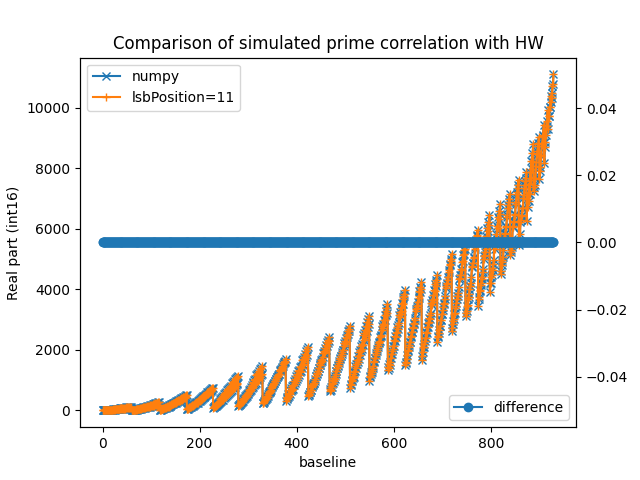

Text(0.5, 0, 'difference')

In [46]:

lsbpos = 11
xcorrflat16 = (xcorrflat >> lsbpos).astype(np.int16)


figure()
plot(xcorrflat16, '-x', label='numpy')
plot(dxf[lsbpos, :], '-+', label=f'lsbPosition={lsbpos}')
legend()
xlabel('baseline')
ylabel('Real part (int16)')
twinx()
plot(dxf[lsbpos,:] - xcorrflat16 , '-o', label='difference')
legend(loc='lower right')
title('Comparison of simulated prime correlation with HW')
xlabel('difference')


In [47]:
xcorrflat16[:10]

array([ 0,  1,  1,  2,  3,  5,  4,  8,  6, 12], dtype=int16)

In [41]:
dxf[0,:10]

array([ 1152,  2592,  2880,  6048,  6336, 11232,  9792, 16416, 13248,
       25056], dtype=int16)

In [42]:
for lsbpos in range(12):
    xcorrflat16 = (xcorrflat >> lsbpos).astype(np.int16)
    diff = dxf[lsbpos,:] - xcorrflat16 
    assert np.all(diff == 0), f'Mistmatch between expected and actual real parts at lsbpos={lsbpos}'


# Let's look to see whether the polsum mode is sensible

In [43]:
!ls -lrth data/testdata-primes-polsum/*.fits

-rw-rw-r-- 1 ban115 ban115 165M May 24 17:00 data/testdata-primes-polsum/test-debughdr-lsb0.fits
-rw-rw-r-- 1 ban115 ban115 165M May 24 17:00 data/testdata-primes-polsum/test-debughdr-lsb1.fits
-rw-rw-r-- 1 ban115 ban115 165M May 24 17:00 data/testdata-primes-polsum/test-debughdr-lsb2.fits
-rw-rw-r-- 1 ban115 ban115 165M May 24 17:00 data/testdata-primes-polsum/test-debughdr-lsb3.fits
-rw-rw-r-- 1 ban115 ban115 165M May 24 17:00 data/testdata-primes-polsum/test-debughdr-lsb4.fits
-rw-rw-r-- 1 ban115 ban115 165M May 24 17:00 data/testdata-primes-polsum/test-debughdr-lsb5.fits
-rw-rw-r-- 1 ban115 ban115 165M May 24 17:01 data/testdata-primes-polsum/test-debughdr-lsb6.fits
-rw-rw-r-- 1 ban115 ban115 165M May 24 17:01 data/testdata-primes-polsum/test-debughdr-lsb7.fits
-rw-rw-r-- 1 ban115 ban115 165M May 24 17:01 data/testdata-primes-polsum/test-debughdr-lsb8.fits
-rw-rw-r-- 1 ban115 ban115 165M May 24 17:01 data/testdata-primes-polsum/test-debughdr-lsb9.fits
-rw-rw-r-- 1 ban115 ban115 165

In [44]:
d = []

for lsb in range(12):
    fname = f'data/testdata-primes-polsum/test-debughdr-lsb{lsb}.fits'
    ccap = CardcapFile(fname)
    print(fname)
    pkts  = ccap.load_packets()
    d.append(pkts)

data/testdata-primes-polsum/test-debughdr-lsb0.fits
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
data/testdata-primes-polsum/test-debughdr-lsb1.fits
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
data/testdata-primes-polsum/test-debughdr-lsb2.fits
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
data/testdata-primes-polsum/test-debughdr-lsb3.fits
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
data/testdata-primes-polsum/test-debughdr-lsb4.fits
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
data/testdata-primes-polsum/test-debughdr-lsb5.fits
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
data/testdata-primes-polsum/test-debughdr-lsb6.fits
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [45]:
darr = np.array(d)
drd = darr['data']

In [46]:
drd.shape

(12, 46080, 2, 465, 1, 2)

In [47]:
assert np.all(drd[...,1] == 0), 'Imaginary part should be zero'


In [48]:
drt = drd[:, 1, 0, :, 0, 0]
drt.shape

(12, 465)

In [49]:
drt[0,:10]

array([  3744,   8928,  17568,  26208, -27232, -15712,  -4768,   7328,
        21152, -31136], dtype=int16)

In [51]:
xcorrflat_polsum[:10]

array([ 3744,  8928, 17568, 26208, 38304, 49824, 60768, 72864, 86688,
       99936])

In [52]:
for lsbpos in range(12):
    xcorrflat16 = (xcorrflat_polsum >> lsbpos).astype(np.int16)
    diff = drt[lsbpos,:] - xcorrflat16 
    assert np.all(diff == 0), f'Mistmatch between expected and actual real parts at lsbpos={lsbpos}'